# <font color='blue'>MNIST</font>
- la data MINST consta de innumerables imagenes para entrenar una red.
    - 60.000 training images (Train)
    - 10.000 test images (Test)

# ENTRENAMIENTO

## MODELO HECHO EN INTERNET
https://www.machinecurve.com/index.php/2020/11/24/one-hot-encoding-for-machine-learning-with-tensorflow-and-keras/

In [2]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Configuration options
clases = len(np.unique(y_train))
img_width, img_height = 28, 28
validation_split = 0.20
no_epochs = 5
verbosity = 1
batch_size = 2000

# Reshape data
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test =  X_test.reshape(X_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Convert targets into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize the data
X_train = normalize(X_train)
X_test = normalize(X_test)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(clases, activation='softmax'))

# Compile the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/5
24/24 [==============================] - 71s 3s/step - loss: 0.6550 - accuracy: 0.7881 - val_loss: 0.2580 - val_accuracy: 0.9238
Epoch 2/5
24/24 [==============================] - 71s 3s/step - loss: 0.1878 - accuracy: 0.9442 - val_loss: 0.1143 - val_accuracy: 0.9647
Epoch 3/5
24/24 [==============================] - 73s 3s/step - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.0813 - val_accuracy: 0.9755
Epoch 4/5
24/24 [==============================] - 70s 3s/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0748 - val_accuracy: 0.9773
Epoch 5/5
24/24 [==============================] - 71s 3s/step - loss: 0.0432 - accuracy: 0.9873 - val_loss: 0.0663 - val_accuracy: 0.9793


In [13]:
type(history.history['loss'])

list

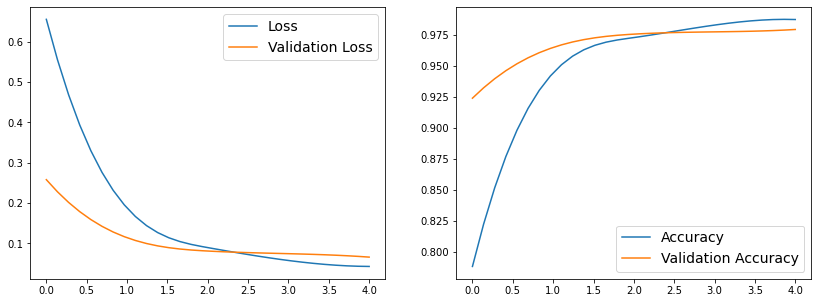

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import make_interp_spline

k=3

loss_no_fil= np.array(history.history['loss'])
val_loss_no_fil= np.array(history.history['val_loss'])
accu_no_fil = np.array(history.history['accuracy'])
val_accu_no_fil = np.array(history.history['val_accuracy'])

x = np.arange(0,5,1)


# INTERPOLATION with scipy

# Creamos un X con mas elementos
x_fil = np.linspace(x.min(), x.max(), 30)

# Interpolamos
spl1 = make_interp_spline(x, loss_no_fil, k=k)
loss_fil = spl1(x_fil)

spl2 = make_interp_spline(x, val_loss_no_fil, k=k)
val_loss_fil = spl2(x_fil)

spl3 = make_interp_spline(x, accu_no_fil, k=k)
accu_fil = spl3(x_fil)

spl4 = make_interp_spline(x, val_accu_no_fil, k=k)
val_accu_fil = spl4(x_fil)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (14, 5))


# PLOT

ax1.plot(x_fil,loss_fil,label='Loss')
ax1.plot(x_fil,val_loss_fil,label='Validation Loss')
ax1.legend(fontsize=14)


ax2.plot(x_fil,accu_fil,label='Accuracy')
ax2.plot(x_fil,val_accu_fil,label='Validation Accuracy')
ax2.legend(fontsize=14)
plt.show()